In [392]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import mpu # for calculate distance between 2 coordinates

In [393]:
df = pd.read_csv(r"C:\Users\eliko\OneDrive\שולחן העבודה\ds\apartments_data10.csv")
df.rename(columns = {'size':'aprt_size'}, inplace = True)
pd.set_option("max_colwidth", 100)
df

,aprt_size,rooms,price,floor,kitchen,heating Type,longitude,latitude,WashingMach,Balcony,Elevetor,parking,bus_walking,url
0,33m²,1,850€,2nd Floor,own kitchen,central heating,13.502420,52.507540,1.0,1.0,0.0,0,3,https://www.wg-gesucht.de/1-zimmer-wohnungen-in-Berlin-Rummelsburg.8115839.html
1,40m²,"1,5",850€,3rd floor,own kitchen,NaN,13.351857,52.500805,1.0,0.0,0.0,0,12,https://www.wg-gesucht.de/wohnungen-in-Berlin-Schoeneberg.9331661.html
2,35m²,1,799€,NaN,NaN,NaN,13.295509,52.473641,1.0,0.0,1.0,0,11,https://www.wg-gesucht.de/1-zimmer-wohnungen-in-Berlin-Schmargendorf.8657017.html
3,33m²,1,819€,NaN,NaN,NaN,13.265390,52.458389,1.0,1.0,1.0,0,15,https://www.wg-gesucht.de/1-zimmer-wohnungen-in-Berlin-Schmargendorf.8656960.html
4,26m²,1,600€,higher than 5th floor,own kitchen,central heating,13.513513,52.505395,1.0,1.0,1.0,0,1,https://www.wg-gesucht.de/1-zimmer-wohnungen-in-Berlin-Friedrichsfelde.9303959.html
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12003,48m²,2,20€,1st floor,NaN,gas heating,13.424177,52.536675,0.0,0.0,0.0,0,14,https://www.wg-gesucht.de/wohnungen-in-Berlin-Prenzlauer-Berg.4515444.html
12004,56m²,2,50€,3rd floor,NaN,NaN,13.404982,52.547848,1.0,1.0,1.0,0,2,https://www.wg-gesucht.de/wohnungen-in-Berlin-Prenzlauer-Berg.7411412.html
12005,110m²,4,2570€,2nd Floor,NaN,NaN,13.292760,52.442228,0.0,1.0,1.0,1,15,https://www.wg-gesucht.de/wohnungen-in-Berlin-Berlin.7714881.html
12006,80m²,2,490€,3rd floor,own kitchen,central heating,13.427734,52.490051,1.0,1.0,0.0,0,15,https://www.wg-gesucht.de/wohnungen-in-Berlin-Neukoelln.7710229.html


drop the duplicates apartaments in our DataFrame

In [394]:
#drop duplicates
df.drop_duplicates(subset =['url'],ignore_index=True,inplace = True)

all the columns bellow had NaN values that we replaced into other values (Categorical and Numeric) in order to repair the data insted of deleting it

In [395]:
#fill nan data
df["kitchen"].fillna("Unavailable", inplace = True)
df["floor"].fillna('ground floor', inplace = True)
df['heating Type'].fillna('Unavailable',inplace=True)
df['Balcony'].fillna(0,inplace=True)
df['Elevetor'].fillna(0,inplace=True)
df['WashingMach'].fillna(0,inplace=True)

In [396]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9924 entries, 0 to 9923
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   aprt_size     9924 non-null   object 
 1   rooms         9924 non-null   object 
 2   price         9924 non-null   object 
 3   floor         9924 non-null   object 
 4   kitchen       9924 non-null   object 
 5   heating Type  9924 non-null   object 
 6   longitude     9924 non-null   float64
 7   latitude      9924 non-null   float64
 8   WashingMach   9924 non-null   float64
 9   Balcony       9924 non-null   float64
 10  Elevetor      9924 non-null   float64
 11  parking       9924 non-null   int64  
 12  bus_walking   9924 non-null   int64  
 13  url           9924 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB


In [397]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

getKmFromCentral is a function that calculates the distance between 2 coordinates and with that we calculated all the distances from the center of berlin.
link to the resource: 
https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude


In [398]:
#central of berlin
# latBer = 52.531677
# longBer = 13.381777

def getKmFromCentral(lat2,lon2):
   # Point one of center berlin
    lat1 = 52.531677
    lon1 = 13.381777
    dist = mpu.haversine_distance((lat1, lon1), (lat2, lon2))
    return dist
        
df["dist"] = np.nan
for i in range(len(df["dist"])):
    df["dist"][i] = getKmFromCentral(df["latitude"][i],df["longitude"][i])

<ipython-input-398-4f1bfc32e64a>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["dist"][i] = getKmFromCentral(df["latitude"][i],df["longitude"][i])


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9924 entries, 0 to 9923
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   aprt_size     9924 non-null   object 
 1   rooms         9924 non-null   object 
 2   price         9924 non-null   object 
 3   floor         9924 non-null   object 
 4   kitchen       9924 non-null   object 
 5   heating Type  9924 non-null   object 
 6   longitude     9924 non-null   float64
 7   latitude      9924 non-null   float64
 8   WashingMach   9924 non-null   float64
 9   Balcony       9924 non-null   float64
 10  Elevetor      9924 non-null   float64
 11  parking       9924 non-null   int64  
 12  bus_walking   9924 non-null   int64  
 13  url           9924 non-null   object 
 14  dist          9924 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 1.1+ MB


we created a dict in order to replace all the "String" values into numeric and also removing all the data that not needed for the convert.

In [400]:
#replace
df.reset_index(drop=True, inplace=True)

floor_dict = {'2nd Floor':2,'3rd floor':3,'higher than 5th floor':6,'1st floor':1,'ground floor':0,
              '5th floor':5,'basement':-1,'4th floor':4,'mezzanine':-2,'attic':-2}

for i in range(len(df)):
    df['aprt_size'][i] = df['aprt_size'][i].replace('m²', '')
    df['rooms'][i] = df['rooms'][i].replace(',', '.')
    df['price'][i] = df['price'][i].replace('€', '')
    df['floor'][i] = floor_dict[df['floor'][i]]
#change object to float\int
df = df.astype({'aprt_size':'int','rooms':'float','price':'int'})

<ipython-input-400-a5f1859f8f25>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['aprt_size'][i] = df['aprt_size'][i].replace('m²', '')
<ipython-input-400-a5f1859f8f25>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rooms'][i] = df['rooms'][i].replace(',', '.')
<ipython-input-400-a5f1859f8f25>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][i] = df['price'][i].replace('€', '')
<ipython-input-400-a5f1859f8f25>:11

# EDA

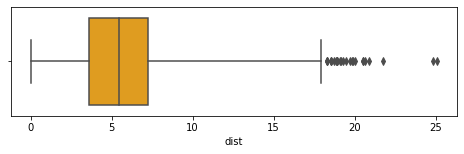

In [401]:
fig = plt.figure(figsize=(8,2))
sns.boxplot(df.dist, whis=3, color="orange")

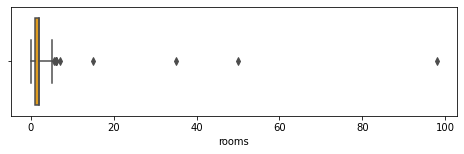

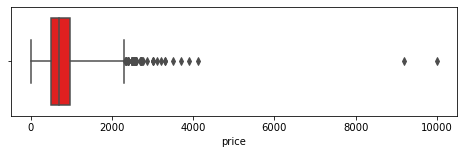

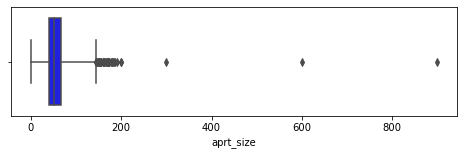

In [402]:
fig = plt.figure(figsize=(8,2))
sns.boxplot(df.rooms, whis=3, color="orange")

fig = plt.figure(figsize=(8,2))
sns.boxplot(df.price, whis=3, color="red")

fig = plt.figure(figsize=(8,2))
sns.boxplot(df.aprt_size, whis=3, color="blue")

In [ ]:
df = df[df['aprt_size'] <= 200] #170
df = df[df['rooms'] <= 6]#5
df = df[df['rooms']>=1]
#starting point
df = df[df['price'] >= 200]     #150
df = df[df['aprt_size'] >= 14]  #10
df['price'][df['price'] > 3500] = np.nan

deleting outliers according to the checks we've done and the graphs above

In [403]:
df[(df['rooms'] == 1) & (df['aprt_size'] >= 60)] = np.nan   #50 #
df[(df['rooms'] == 2) & (df['aprt_size'] >= 90)] = np.nan  #90  
df[(df['rooms'] == 3) & (df['aprt_size'] <= 20)] = np.nan   #20 
df[(df['rooms'] == 4) & (df['aprt_size'] <= 50)] = np.nan   #50
df[(df['rooms'] == 5) & (df['aprt_size'] <= 110)] = np.nan  #110
df[(df['rooms'] == 6) & (df['aprt_size'] <= 150)] = np.nan  #150
df[(df['price'] >=2700) & (df['aprt_size'] <= 130)] =np.nan
df[(df['price'] >=500)&(df['price'] <=1000) & (df['aprt_size'] >=100)] =np.nan
df[(df['price'] >=2400) & (df['aprt_size'] <= 50)] =np.nan
df[(df['price'] <1350) & (df['aprt_size'] >= 150)] =np.nan
df[(df['price'] <500) & (df['aprt_size'] >= 75)] =np.nan
df[(df['price'] <300) & (df['aprt_size'] >= 40)] = np.nan
df[(df['price'] <2500) & (df['price'] >= 1000) & (df['aprt_size'] <=40)]=np.nan
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

we added this column for better corrolations between the columns

In [404]:
df["Score"] = 0
for i in range(len(df["rooms"])):
    if df["rooms"][i] <=6 and df["rooms"][i] >=4:
        df["Score"][i]= df["Score"][i] + 2
        
    if df["floor"][i] <=6 and df["floor"][i] >=4:
        df["Score"][i]= df["Score"][i] + 2
        
    if df["Balcony"][i] == 1:
        df["Score"][i]= df["Score"][i] + 1
        
    if df["WashingMach"][i] == 1:
        df["Score"][i]= df["Score"][i] + 1
    if df['aprt_size'][i] > 50:
        if df['aprt_size'][i] > 80:
            df["Score"][i]= df["Score"][i] + 2
        else:
            df["Score"][i]= df["Score"][i] + 1
    else:
        df["Score"][i]= df["Score"][i] - 1
        
    if df["Elevetor"][i] == 0 and df["floor"][i] <=6 and df["floor"][i] >=4:
        df["Score"][i]= df["Score"][i] -2
        
    if df["rooms"][i] <=3.5 and df["rooms"][i] >=2.5:
        df["Score"][i]= df["Score"][i] + 1
        
    if df["floor"][i] <=3 and df["floor"][i] >=1:
        df["Score"][i]= df["Score"][i] + 1
              
    if df["dist"][i] < 24:
        if df["dist"][i] <= 5:
            df["Score"][i]= df["Score"][i] +2
        elif df["dist"][i] <= 10:
            df["Score"][i]= df["Score"][i] +2
        else:
            df["Score"][i]= df["Score"][i] +1
    else:
        df["Score"][i]= df["Score"][i] - 1 
    if df['bus_walking'][i] <=10:
        df["Score"][i] = df["Score"][i] +1
    if df['parking'][i] == 1:
        df["Score"][i] = df["Score"][i] +2

<ipython-input-404-668abf36f073>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Score"][i]= df["Score"][i] + 1
<ipython-input-404-668abf36f073>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Score"][i]= df["Score"][i] + 1
<ipython-input-404-668abf36f073>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Score"][i]= df["Score"][i] - 1
<ipython-input-404-668abf36f073>:29: SettingWithCopyWarning: 
A value is trying to be

deleting more outliers

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8667 entries, 0 to 8859
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   aprt_size     8667 non-null   float64
 1   rooms         8667 non-null   float64
 2   price         8667 non-null   float64
 3   floor         8667 non-null   object 
 4   kitchen       8667 non-null   object 
 5   heating Type  8667 non-null   object 
 6   longitude     8667 non-null   float64
 7   latitude      8667 non-null   float64
 8   WashingMach   8667 non-null   float64
 9   Balcony       8667 non-null   float64
 10  Elevetor      8667 non-null   float64
 11  parking       8667 non-null   float64
 12  bus_walking   8667 non-null   float64
 13  url           8667 non-null   object 
 14  dist          8667 non-null   float64
 15  Score         8667 non-null   int64  
dtypes: float64(11), int64(1), object(4)
memory usage: 1.1+ MB


In [408]:
df.reset_index(drop=True,inplace=True)

this function should convert all the columns bellow into binary and split them according to the df.column.unique() value.

In [409]:
catagory_list=['floor','kitchen','heating Type']
for catag in catagory_list:
        df[catag]= df[catag].astype('category')
        df=pd.get_dummies(df,columns=[catag],prefix=[catag])

In [410]:
df.describe()

,aprt_size,rooms,price,longitude,latitude,WashingMach,Balcony,Elevetor,parking,bus_walking,...,kitchen_own kitchen,kitchen_shared kitchen,heating Type_Kohleofen,heating Type_Unavailable,heating Type_central heating,heating Type_coal stove,heating Type_district heating,heating Type_furnace heating,heating Type_gas heating,heating Type_night storage heater
count,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,...,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000,8667.000000
mean,54.568594,1.773509,810.265490,13.399948,52.508071,0.651206,0.450329,0.202608,0.212530,7.965040,...,0.482058,0.003808,0.001038,0.340833,0.451136,0.000577,0.054229,0.004961,0.145494,0.001731
std,21.396734,0.778297,394.000755,0.068133,0.034282,0.476616,0.497555,0.401966,0.409122,4.291889,...,0.499707,0.061591,0.032210,0.474017,0.497635,0.024013,0.226481,0.070266,0.352619,0.041568
min,14.000000,1.000000,200.000000,13.120129,52.379522,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.000000,540.000000,13.353882,52.485005,0.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,2.000000,725.000000,13.415561,52.508722,1.000000,0.000000,0.000000,0.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,2.000000,974.500000,13.441806,52.534124,1.000000,1.000000,0.000000,0.000000,12.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,200.000000,6.000000,3300.000000,13.711234,52.643059,1.000000,1.000000,1.000000,1.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [411]:
df.to_csv(r'C:\Users\eliko\OneDrive\שולחן העבודה\ds\finalClean3.csv',index=False)